In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

In [35]:
dataset = pd.read_csv("drug_consumption.txt",header=None)

In [36]:
_input = dataset.iloc[:,1:13]
classification = dataset.iloc[:,13:]

#Taking the following 6 drugs from the dataset for analysis across the 4 classifications
#alcohol,amphetamines,cannabis,chocolate,LSD,mushrooms
#0 - to indicate NON-USERS
#1 - to indicate USERS

classification = classification.iloc[:,[0,1,4,5,13,15]]
classification = classification.replace(to_replace = ["CL0","CL1"], value = 0)
classification = classification.replace(to_replace =["CL2","CL3","CL4","CL5","CL6"],value = 1)

#Example of input and output columns
print(_input.loc[0,:],"\n",classification.loc[0,:])

#setting variables for calculating true positive, false postive, false negative and true negative
truePositive = 0
falsePostive = 0
falseNegative = 0
trueNegative = 0

1     0.49788
2     0.48246
3    -0.05921
4     0.96082
5     0.12600
6     0.31287
7    -0.57545
8    -0.58331
9    -0.91699
10   -0.00665
11   -0.21712
12   -1.18084
Name: 0, dtype: float64 
 13    1
14    1
17    1
18    0
26    0
28    0
Name: 0, dtype: int64


Testing accuracy of KNN for Alcohol =  0.9662921348314607
Confusion Matrix : 
[[  0  21]
 [  0 602]]
Precision =  0.9662921348314607
Recall =  1.0
ROC Curve : 


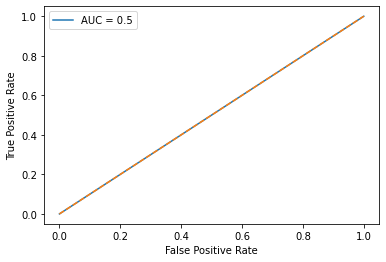

In [37]:
#ALCOHOL
_input = pd.DataFrame(SelectKBest().fit_transform(_input,classification.iloc[:,0]))
classifier = classification.iloc[:,0]

#Splitting the dataset into training(67%) and testing(33%) data. 
inputTraining,inputTest,classificationTraining,classificationTest = train_test_split(_input,classifier,test_size=0.33)
#inputTraining,classificationTraining = make_classification()

#Using GridSearchCV to find best value for 'k'
params = {"n_neighbors": range(1, 30)}
gridSearch = GridSearchCV(KNeighborsClassifier(), params)
gridSearch.fit(inputTraining,classificationTraining)

# Training a KNN classifier for Alcohol
knnClassifier = KNeighborsClassifier(n_neighbors=gridSearch.best_params_['n_neighbors'])
knnClassifier.fit(inputTraining,classificationTraining)
predictedClassification = knnClassifier.predict(inputTest)
print("Testing accuracy of KNN for Alcohol = ",accuracy_score(classificationTest,predictedClassification))
print("Confusion Matrix : ")
confusionMatrix = confusion_matrix(classificationTest,predictedClassification)
print(confusionMatrix)
truePositive = truePositive+confusionMatrix[0][0]
falsePostive = falsePostive+confusionMatrix[0][1]
falseNegative = falseNegative+confusionMatrix[1][0]
trueNegative = trueNegative+confusionMatrix[1][1]
print("Precision = ", precision_score(classificationTest,predictedClassification))
print("Recall = ", recall_score(classificationTest,predictedClassification))
falsePositiveRate1, truePositiveRate1, _ = metrics.roc_curve(classificationTest,predictedClassification)
areaUnderCurve = metrics.roc_auc_score(classificationTest,predictedClassification)
print("ROC Curve : ")
plt.plot(falsePositiveRate1,truePositiveRate1,label="AUC = "+str(areaUnderCurve))
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Testing accuracy of KNN for Amphetamines =  0.7319422150882825
Confusion Matrix : 
[[338  79]
 [ 88 118]]
Precision =  0.5989847715736041
Recall =  0.5728155339805825
ROC Curve : 


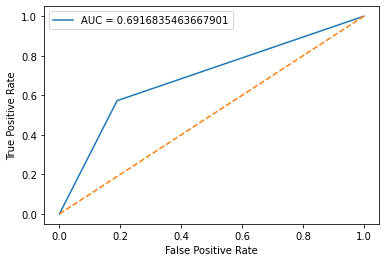

In [38]:
#AMPHETAMINES
_input = pd.DataFrame(SelectKBest().fit_transform(_input,classification.iloc[:,1]))
classifier = classification.iloc[:,1]

#Splitting the dataset into training(67%) and testing(33%) data. 
inputTraining,inputTest,classificationTraining,classificationTest = train_test_split(_input,classifier,test_size=0.33)
#inputTraining,classificationTraining = make_classification()

#Using GridSearchCV to find best value for 'k'
params = {"n_neighbors": range(1, 30)}
gridSearch = GridSearchCV(KNeighborsClassifier(), params)
gridSearch.fit(inputTraining,classificationTraining)

# Training a KNN classifier for Amphetamines
knnClassifier = KNeighborsClassifier(n_neighbors=gridSearch.best_params_['n_neighbors'])
knnClassifier.fit(inputTraining,classificationTraining)
predictedClassification = knnClassifier.predict(inputTest)
print("Testing accuracy of KNN for Amphetamines = ",accuracy_score(classificationTest,predictedClassification))
print("Confusion Matrix : ")
confusionMatrix = confusion_matrix(classificationTest,predictedClassification)
print(confusionMatrix)
truePositive = truePositive+confusionMatrix[0][0]
falsePostive = falsePostive+confusionMatrix[0][1]
falseNegative = falseNegative+confusionMatrix[1][0]
trueNegative = trueNegative+confusionMatrix[1][1]
print("Precision = ", precision_score(classificationTest,predictedClassification))
print("Recall = ", recall_score(classificationTest,predictedClassification))
falsePositiveRate2, truePositiveRate2, _ = metrics.roc_curve(classificationTest,predictedClassification)
areaUnderCurve = metrics.roc_auc_score(classificationTest,predictedClassification)
print("ROC Curve : ")
plt.plot(falsePositiveRate2,truePositiveRate2,label="AUC = "+str(areaUnderCurve))
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Testing accuracy of KNN for Cannabis =  0.9791332263242376
Confusion Matrix : 
[[  0  13]
 [  0 610]]
Precision =  0.9791332263242376
Recall =  1.0
ROC Curve : 


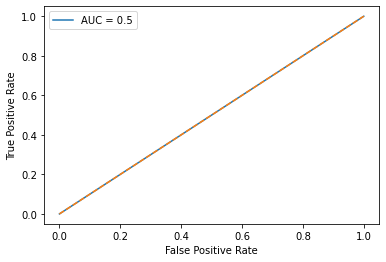

In [39]:
#CANNABIS
_input = pd.DataFrame(SelectKBest().fit_transform(_input,classification.iloc[:,2]))
classifier = classification.iloc[:,2]

#Splitting the dataset into training(67%) and testing(33%) data. 
inputTraining,inputTest,classificationTraining,classificationTest = train_test_split(_input,classifier,test_size=0.33)
#inputTraining,classificationTraining = make_classification()

#Using GridSearchCV to find best value for 'k'
params = {"n_neighbors": range(1, 30)}
gridSearch = GridSearchCV(KNeighborsClassifier(), params)
gridSearch.fit(inputTraining,classificationTraining)

# Training a KNN classifier for Cannabis
knnClassifier = KNeighborsClassifier(n_neighbors=gridSearch.best_params_['n_neighbors'])
knnClassifier.fit(inputTraining,classificationTraining)
predictedClassification = knnClassifier.predict(inputTest)
print("Testing accuracy of KNN for Cannabis = ",accuracy_score(classificationTest,predictedClassification))
print("Confusion Matrix : ")
confusionMatrix = confusion_matrix(classificationTest,predictedClassification)
print(confusionMatrix)
truePositive = truePositive+confusionMatrix[0][0]
falsePostive = falsePostive+confusionMatrix[0][1]
falseNegative = falseNegative+confusionMatrix[1][0]
trueNegative = trueNegative+confusionMatrix[1][1]
print("Precision = ", precision_score(classificationTest,predictedClassification))
print("Recall = ", recall_score(classificationTest,predictedClassification))
falsePositiveRate3, truePositiveRate3, _ = metrics.roc_curve(classificationTest,predictedClassification)
areaUnderCurve = metrics.roc_auc_score(classificationTest,predictedClassification)
print("ROC Curve : ")
plt.plot(falsePositiveRate3,truePositiveRate3,label="AUC = "+str(areaUnderCurve))
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Testing accuracy of KNN for Chocolate =  0.7913322632423756
Confusion Matrix : 
[[127  59]
 [ 71 366]]
Precision =  0.8611764705882353
Recall =  0.8375286041189931
ROC Curve : 


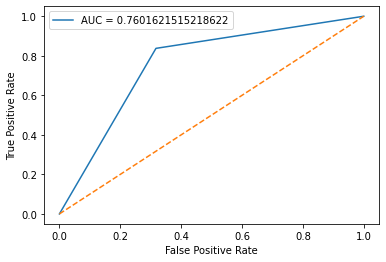

In [40]:
#CHOCOLATE
_input = pd.DataFrame(SelectKBest().fit_transform(_input,classification.iloc[:,3]))
classifier = classification.iloc[:,3]

#Splitting the dataset into training(67%) and testing(33%) data. 
inputTraining,inputTest,classificationTraining,classificationTest = train_test_split(_input,classifier,test_size=0.33)
#inputTraining,classificationTraining = make_classification()

#Using GridSearchCV to find best value for 'k'
params = {"n_neighbors": range(1, 30)}
gridSearch = GridSearchCV(KNeighborsClassifier(), params)
gridSearch.fit(inputTraining,classificationTraining)

# Training a KNN classifier for Chocolate
knnClassifier = KNeighborsClassifier(n_neighbors=gridSearch.best_params_['n_neighbors'])
knnClassifier.fit(inputTraining,classificationTraining)
predictedClassification = knnClassifier.predict(inputTest)
print("Testing accuracy of KNN for Chocolate = ",accuracy_score(classificationTest,predictedClassification))
print("Confusion Matrix : ")
confusionMatrix = confusion_matrix(classificationTest,predictedClassification)
print(confusionMatrix)
truePositive = truePositive+confusionMatrix[0][0]
falsePostive = falsePostive+confusionMatrix[0][1]
falseNegative = falseNegative+confusionMatrix[1][0]
trueNegative = trueNegative+confusionMatrix[1][1]
print("Precision = ", precision_score(classificationTest,predictedClassification))
print("Recall = ", recall_score(classificationTest,predictedClassification))
falsePositiveRate4, truePositiveRate4, _ = metrics.roc_curve(classificationTest,predictedClassification)
areaUnderCurve = metrics.roc_auc_score(classificationTest,predictedClassification)
print("ROC Curve : ")
plt.plot(falsePositiveRate4,truePositiveRate4,label="AUC = "+str(areaUnderCurve))
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Testing accuracy of KNN for LSD =  0.7688603531300161
Confusion Matrix : 
[[354  73]
 [ 71 125]]
Precision =  0.6313131313131313
Recall =  0.6377551020408163
ROC Curve : 


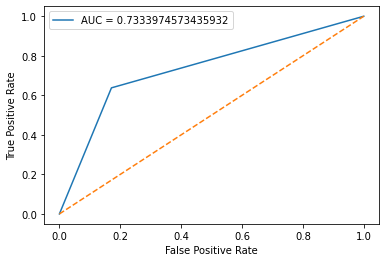

In [41]:
#LSD
_input = pd.DataFrame(SelectKBest().fit_transform(_input,classification.iloc[:,4]))
classifier = classification.iloc[:,4]

#Splitting the dataset into training(67%) and testing(33%) data. 
inputTraining,inputTest,classificationTraining,classificationTest = train_test_split(_input,classifier,test_size=0.33)
#inputTraining,classificationTraining = make_classification()

#Using GridSearchCV to find best value for 'k'
params = {"n_neighbors": range(1, 30)}
gridSearch = GridSearchCV(KNeighborsClassifier(), params)
gridSearch.fit(inputTraining,classificationTraining)

# Training a KNN classifier for LSD
knnClassifier = KNeighborsClassifier(n_neighbors=gridSearch.best_params_['n_neighbors'])
knnClassifier.fit(inputTraining,classificationTraining)
predictedClassification = knnClassifier.predict(inputTest)
print("Testing accuracy of KNN for LSD = ",accuracy_score(classificationTest,predictedClassification))
print("Confusion Matrix : ")
confusionMatrix = confusion_matrix(classificationTest,predictedClassification)
print(confusionMatrix)
truePositive = truePositive+confusionMatrix[0][0]
falsePostive = falsePostive+confusionMatrix[0][1]
falseNegative = falseNegative+confusionMatrix[1][0]
trueNegative = trueNegative+confusionMatrix[1][1]
print("Precision = ", precision_score(classificationTest,predictedClassification))
print("Recall = ", recall_score(classificationTest,predictedClassification))
falsePositiveRate5, truePositiveRate5, _ = metrics.roc_curve(classificationTest,predictedClassification)
areaUnderCurve = metrics.roc_auc_score(classificationTest,predictedClassification)
print("ROC Curve : ")
plt.plot(falsePositiveRate5,truePositiveRate5,label="AUC = "+str(areaUnderCurve))
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Testing accuracy of KNN for Mushrooms =  0.7688603531300161
Confusion Matrix : 
[[334  75]
 [ 69 145]]
Precision =  0.6590909090909091
Recall =  0.677570093457944
ROC Curve : 


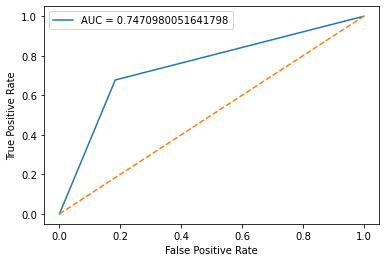

In [42]:
#MUSHROOMS
_input = pd.DataFrame(SelectKBest().fit_transform(_input,classification.iloc[:,5]))
classifier = classification.iloc[:,5]

#Splitting the dataset into training(67%) and testing(33%) data. 
inputTraining,inputTest,classificationTraining,classificationTest = train_test_split(_input,classifier,test_size=0.33)
#inputTraining,classificationTraining = make_classification()

#Using GridSearchCV to find best value for 'k'
params = {"n_neighbors": range(1, 30)}
gridSearch = GridSearchCV(KNeighborsClassifier(), params)
gridSearch.fit(inputTraining,classificationTraining)

# Training a KNN classifier for Mushrooms
knnClassifier = KNeighborsClassifier(n_neighbors=gridSearch.best_params_['n_neighbors'])
knnClassifier.fit(inputTraining,classificationTraining)
predictedClassification = knnClassifier.predict(inputTest)
print("Testing accuracy of KNN for Mushrooms = ",accuracy_score(classificationTest,predictedClassification))
print("Confusion Matrix : ")
confusionMatrix = confusion_matrix(classificationTest,predictedClassification)
print(confusionMatrix)
truePositive = truePositive+confusionMatrix[0][0]
falsePostive = falsePostive+confusionMatrix[0][1]
falseNegative = falseNegative+confusionMatrix[1][0]
trueNegative = trueNegative+confusionMatrix[1][1]
print("Precision = ", precision_score(classificationTest,predictedClassification))
print("Recall = ", recall_score(classificationTest,predictedClassification))
falsePositiveRate6, truePositiveRate6, _ = metrics.roc_curve(classificationTest,predictedClassification)
areaUnderCurve = metrics.roc_auc_score(classificationTest,predictedClassification)
print("ROC Curve : ")
plt.plot(falsePositiveRate6,truePositiveRate6,label="AUC = "+str(areaUnderCurve))
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

[[1153  320]
 [ 299 1966]]

Overall accuracy =  83.44 %

Overall precision =  0.78

Overall recall =  0.79

ROC Curve : 


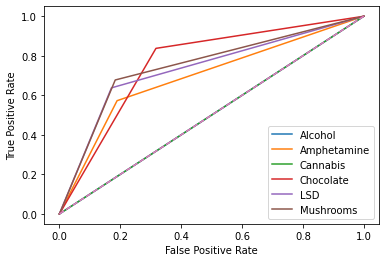

In [43]:
#Overall performance of KNN
confusionMatrix[0][0] = truePositive
confusionMatrix[0][1] = falsePostive
confusionMatrix[1][0] = falseNegative
confusionMatrix[1][1] = trueNegative
print("Confusion Matrix: \n")
print(confusionMatrix)

Accuracy = (trueNegative+truePositive)/(trueNegative+truePositive+falseNegative+falsePostive)
print("\nOverall accuracy = ",'%.2f' % (Accuracy*100), "%")

Precision = truePositive/(truePositive+falsePostive)
print("\nOverall precision = ",'%.2f' % Precision)

Recall = truePositive/(truePositive+falseNegative)
print("\nOverall recall = ",'%.2f' % Recall)

truePositiveRate = truePositive/(truePositive+falseNegative)
falsePositiveRate = falsePostive/(falsePostive+trueNegative)
print("\nROC Curve : ")
plt.plot(falsePositiveRate1,truePositiveRate1,label = "Alcohol")
plt.plot(falsePositiveRate2,truePositiveRate2,label = "Amphetamine")
plt.plot(falsePositiveRate3,truePositiveRate3,label = "Cannabis")
plt.plot(falsePositiveRate4,truePositiveRate4,label = "Chocolate")
plt.plot(falsePositiveRate5,truePositiveRate5,label = "LSD")
plt.plot(falsePositiveRate6,truePositiveRate6,label = "Mushrooms")
plt.plot([0, 1], ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()